# COUNTY

According with the requirements, the most difficult requeriment to taking into account is the aiport because all the rest are easier to find anywhere. So in order to choose the best county we will search all the cities with an airport nearby. Once we got the cities we will analyse the population as we will need a young population to satisfy all the employees (that actually the are 25 and 40 years old).

In [ ]:
from dotenv import load_dotenv
import os
import pandas as pd
import requests
import json, requests
from folium import Map, Marker, Icon, FeatureGroup, LayerControl, Choropleth
from folium.plugins import HeatMap
from folium.vector_layers import Circle, Polygon
from functions import query_api

In [151]:
load_dotenv()

True

In [152]:
fs_token = os.getenv("foursquare_KEY")
fs_id = os.getenv("foursquare_ID")

## Airports

In [155]:
data = query_api("airports","California")

In [160]:
data.keys()

dict_keys(['meta', 'response'])

In [122]:
airports = [[i['venue']['location']['lat'],i['venue']['location']['lng']] for i in data['response']['groups'][0]['items']]
cities = [i['venue']['location']["city"] for i in data['response']['groups'][0]['items']]

In [123]:
city_airport_lst=[]
for i in range(len(cities)):
        city_airport = {"city":cities[i],"airport":airports[i]}
        city_airport_lst.append(city_airport)

In [124]:
df=pd.DataFrame(city_airport_lst)

In [125]:
df.head(5)

,city,airport
0,Palm Springs,"[33.82316943745962, -116.507594590106]"
1,Long Beach,"[33.81721775280286, -118.14612529298756]"
2,San Diego,"[32.732760354061355, -117.20122208603101]"
3,Sacramento,"[38.6929338703567, -121.58825668247535]"
4,Santa Ana,"[33.678556182437845, -117.86189797028071]"


In [165]:
m = Map(location=[36.739140, -119.790379],zoom_start=4)
for i, row in df.iterrows():
    city = {
        "location":row["airport"],
        "popup":"airport",
        "tooltip":row["city"]
    }

    ic = Icon(color="blue",
              prefix="fa",
              icon="plane")
    Marker(**city, icon=ic).add_to(m)

In [168]:
m

The office should be in one of the following counties:
- Eureka (Humbolt)
- Sacramento
- Oakland (Alameda)
- San Francisco 
- Long beach (Los Angeles)
- San Jose (Santa Clara)
- Fresno
- Santa Barbara
- San Diego
- Palm Spring (Riverside)
- Ontario (San Bernardino)
- Santa Ana (Orange)
<div>
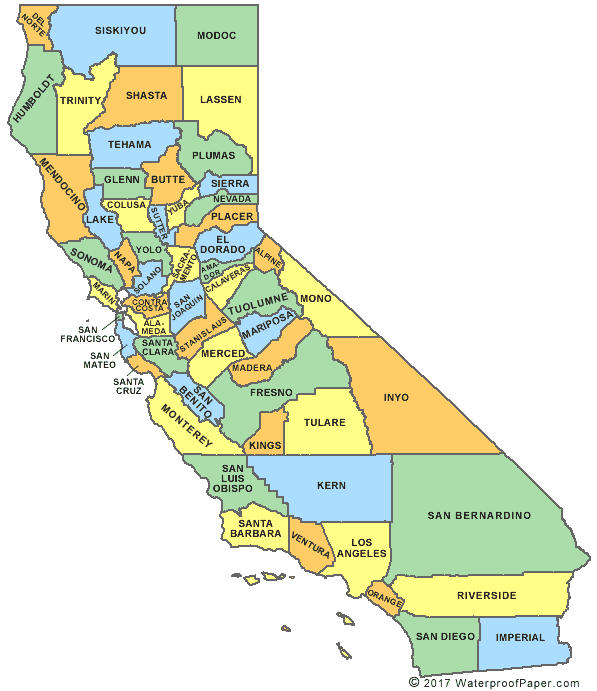
</div>


 ## Population

I got a dataset from [Department of Finance of California](http://www.dof.ca.gov/Forecasting/Demographics/Projections/)
I loaded the dataset in tableau public where I had to clean and prepare the data before using it. Finally I could make a dynamic [population pyramid](https://public.tableau.com/profile/isabel.searle.riesgo#!/vizhome/CaliforniaPopulationPyramid/LosAngeles?publish=yeswhere) I made a research of all the population in California, I could filter by county and see the estimated evolution during the years. :
<div>
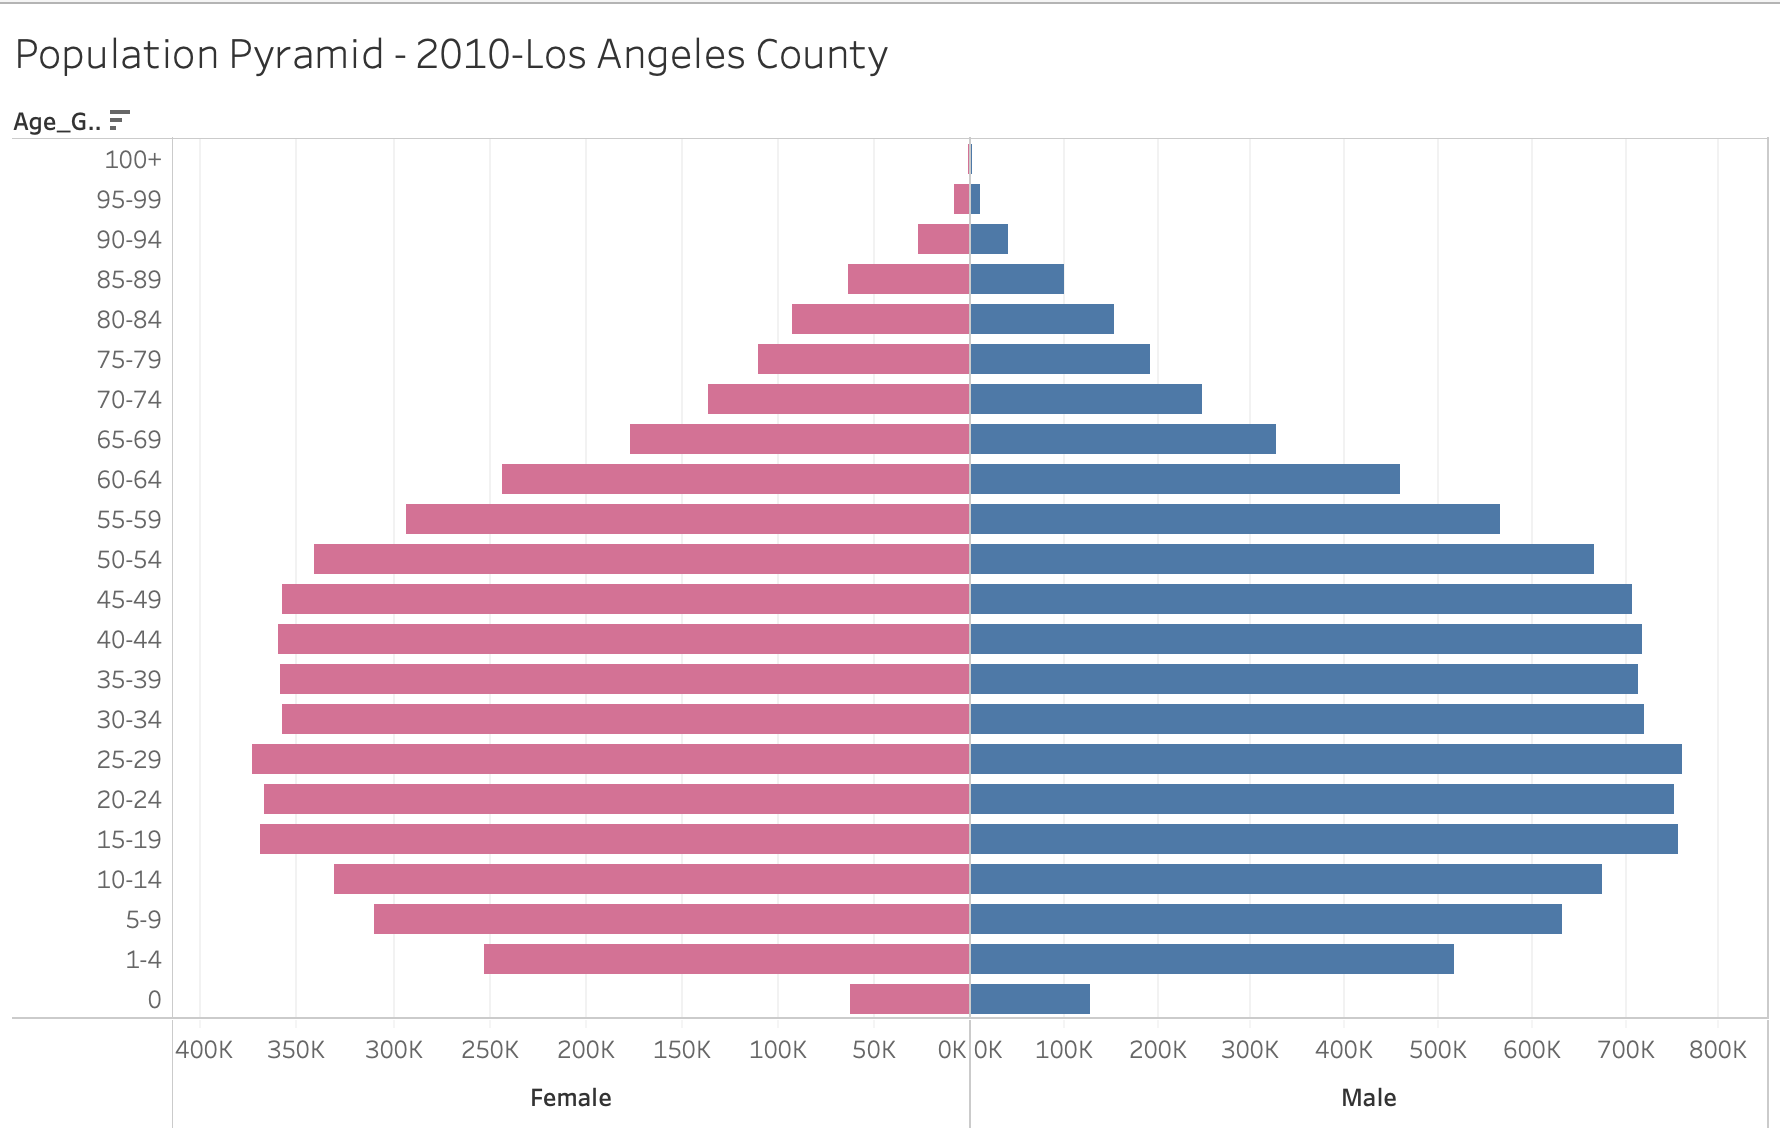
</div>

## Conclusion

I compared the population of all the counties from the above list (with a near airport) and I decided that Los Angeles is the best County as their young population (20-45) is really high.
